In [1]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [2]:
import os
import urllib

data_dir='/content/gdrive/MyDrive/data/capstone_nlp'
files_dict ={'training-parallel-europarl-v7.tgz':'https://statmt.org/wmt13/training-parallel-europarl-v7.tgz',
             'training-parallel-commoncrawl.tgz':'https://statmt.org/wmt13/training-parallel-commoncrawl.tgz',
             'training-parallel-nc-v9.tgz':'https://statmt.org/wmt14/training-parallel-nc-v9.tgz'}

for file_name in files_dict.keys():
  if (not os.path.isfile(os.path.join(data_dir,file_name))):
    urllib.request.urlretrieve(files_dict.get(file_name), os.path.join(data_dir,file_name))

os.listdir(data_dir)

['commoncrawl.es-en.en',
 'commoncrawl.fr-en.en',
 'commoncrawl.ru-en.en',
 'commoncrawl.cs-en.en',
 'training-parallel-europarl-v7.tgz',
 'training-parallel-commoncrawl.tgz',
 '.ipynb_checkpoints',
 'training-parallel-nc-v9.tgz',
 'dev.tgz',
 'dev',
 'training',
 'de-en-lstm',
 'commoncrawl.de-en.de',
 'commoncrawl.de-en.en']

In [3]:
import tarfile

files_list=files_dict.keys()
ext_eng_file='de-en.en'
ext_german_file='de-en.de'
## For Dev Testing only
## For actual training, use the files downloaded in the above step
##files_list=['dev.tgz']
##ext_eng_file='en'
##ext_german_file='de'
file_en=[]
file_de=[]

for file in files_list:
  tar_file=tarfile.open(os.path.join(data_dir,file))
  for file_name in tar_file.getnames():
    if file_name.endswith(ext_german_file):
      file_de.append(file_name)
      tar_file.extract(file_name,path=data_dir)
    elif file_name.endswith(ext_eng_file):
      file_en.append(file_name)
      tar_file.extract(file_name,path=data_dir)

print(f"English files : {file_en}")
print(f"German files : {file_de}")

English files : ['training/europarl-v7.de-en.en', 'commoncrawl.de-en.en', 'training/news-commentary-v9.de-en.en']
German files : ['training/europarl-v7.de-en.de', 'commoncrawl.de-en.de', 'training/news-commentary-v9.de-en.de']


In [4]:

import pandas as pd

key_lst=[]
file_lst=[]

for file_name in file_en:
  key=file_name.split('.')[0].split('/')[len(file_name.split('.')[0].split('/'))-1]
  key_lst.append(key)
  file_lst.append(os.path.join(data_dir,file_name))

df_file_en=pd.DataFrame({'key':key_lst,
                         'en_location':file_lst})
key_lst.clear()
file_lst.clear()

for file_name in file_de:
  key=file_name.split('.')[0].split('/')[len(file_name.split('.')[0].split('/'))-1]
  key_lst.append(key)
  file_lst.append(os.path.join(data_dir,file_name))

df_file_de=pd.DataFrame({'key':key_lst,
                         'de_location':file_lst})

df_corpus_file=pd.merge(df_file_en,df_file_de,on='key',how='inner')
df_corpus_file.head()




,key,en_location,de_location
0,europarl-v7,/content/gdrive/MyDrive/data/capstone_nlp/trai...,/content/gdrive/MyDrive/data/capstone_nlp/trai...
1,commoncrawl,/content/gdrive/MyDrive/data/capstone_nlp/comm...,/content/gdrive/MyDrive/data/capstone_nlp/comm...
2,news-commentary-v9,/content/gdrive/MyDrive/data/capstone_nlp/trai...,/content/gdrive/MyDrive/data/capstone_nlp/trai...


In [5]:
corpus_en=[]
corpus_de=[]

def read_sentences(file_to_read):
  corpus=[]
  with open(file_to_read, 'r') as readfile:
    sentences=readfile.read().split('\n')  
    for sentence in sentences:
      if len(sentence) > 0:
        corpus.append(sentence)
  return corpus

for _,row in df_corpus_file.iterrows():
    en_text = read_sentences(row['en_location'])
    de_text = read_sentences(row['de_location'])
    if len(en_text) == len(de_text):
        corpus_en.extend(en_text)
        corpus_de.extend(de_text)

English sentence length statistics:
count    2.399123e+06
mean     1.294913e+02
std      1.001210e+02
min      1.300000e+01
25%      7.600000e+01
50%      1.110000e+02
75%      1.620000e+02
max      3.586100e+04
Name: en_length, dtype: float64
German sentence length statistics:
count    2.399123e+06
mean     1.387518e+02
std      9.392734e+01
min      1.700000e+01
25%      8.200000e+01
50%      1.200000e+02
75%      1.740000e+02
max      2.835100e+04
Name: de_length, dtype: float64


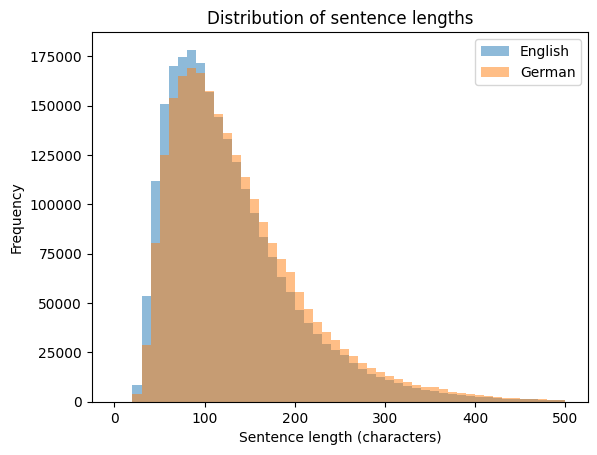

English sentence word count statistics:
count    2.399123e+06
mean     2.142348e+01
std      1.501270e+01
min      6.000000e+00
25%      1.300000e+01
50%      1.800000e+01
75%      2.700000e+01
max      4.225000e+03
Name: en_words, dtype: float64
German sentence word count statistics:
count    2.399123e+06
mean     1.961019e+01
std      1.266590e+01
min      6.000000e+00
25%      1.200000e+01
50%      1.700000e+01
75%      2.400000e+01
max      2.937000e+03
Name: de_words, dtype: float64


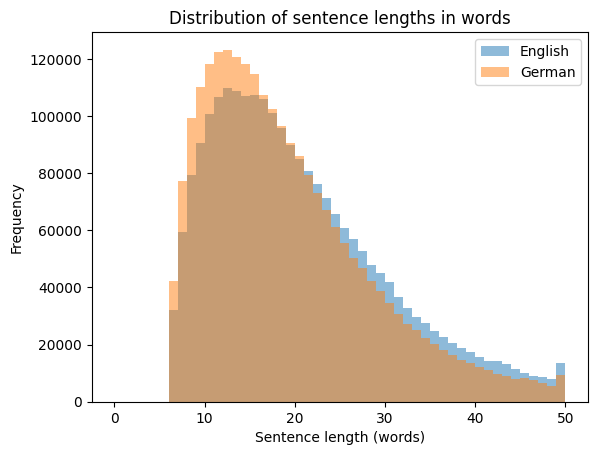

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Combine the English and German sentences into a single dataframe
df_corpus = pd.DataFrame({'en': corpus_en, 'de': corpus_de})

# Compute the length of each sentence in characters and add as new columns
df_corpus['en_length'] = df_corpus['en'].apply(lambda x: len(x))
df_corpus['de_length'] = df_corpus['de'].apply(lambda x: len(x))

# Compute summary statistics on sentence lengths
print('English sentence length statistics:')
print(df_corpus['en_length'].describe())
print('German sentence length statistics:')
print(df_corpus['de_length'].describe())

# Plot the distribution of sentence lengths
plt.hist(df_corpus['en_length'], bins=50, range=(0,500), alpha=0.5, label='English')
plt.hist(df_corpus['de_length'], bins=50, range=(0,500), alpha=0.5, label='German')
plt.legend()
plt.xlabel('Sentence length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of sentence lengths')
plt.show()

# Compute the number of words in each sentence and add as new columns
df_corpus['en_words'] = df_corpus['en'].apply(lambda x: len(x.split()))
df_corpus['de_words'] = df_corpus['de'].apply(lambda x: len(x.split()))

# Compute summary statistics on sentence lengths in words
print('English sentence word count statistics:')
print(df_corpus['en_words'].describe())
print('German sentence word count statistics:')
print(df_corpus['de_words'].describe())

# Plot the distribution of sentence lengths in words
plt.hist(df_corpus['en_words'], bins=50, range=(0,50), alpha=0.5, label='English')
plt.hist(df_corpus['de_words'], bins=50, range=(0,50), alpha=0.5, label='German')
plt.legend()
plt.xlabel('Sentence length (words)')
plt.ylabel('Frequency')
plt.title('Distribution of sentence lengths in words')
plt.show()

In [7]:
df_corpus.head()

,en,de,en_length,de_length,en_words,de_words
0,iron cement is a ready for use paste which is ...,"iron cement ist eine gebrauchs-fertige Paste, ...",142,166,29,24
1,iron cement protects the ingot against the hot...,Nach der Aushärtung schützt iron cement die Ko...,79,92,12,14
2,"a fire restant repair cement for fire places, ...",feuerfester Reparaturkitt für Feuerungsanlagen...,73,78,12,8
3,Construction and repair of highways and...,Der Bau und die Reparatur der Autostraßen...,42,44,6,7
4,An announcement must be commercial character.,die Mitteilungen sollen den geschäftlichen kom...,45,74,6,8


In [8]:
df_corpus=df_corpus.loc[(df_corpus['de_words'] <= 15) & (df_corpus['en_words'] <= 15)]
df_corpus.head()

,en,de,en_length,de_length,en_words,de_words
1,iron cement protects the ingot against the hot...,Nach der Aushärtung schützt iron cement die Ko...,79,92,12,14
2,"a fire restant repair cement for fire places, ...",feuerfester Reparaturkitt für Feuerungsanlagen...,73,78,12,8
3,Construction and repair of highways and...,Der Bau und die Reparatur der Autostraßen...,42,44,6,7
4,An announcement must be commercial character.,die Mitteilungen sollen den geschäftlichen kom...,45,74,6,8
5,Goods and services advancement through the P.O...,der Vertrieb Ihrer Waren und Dienstleistungen ...,73,94,11,12


In [9]:
len(df_corpus)
df_corpus=df_corpus[df_corpus.index <= 10000]
corpus_en = list(df_corpus['en'])
corpus_de = list(df_corpus['de'])

**Preprocess data**


In [10]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=8da6ca261e05514320dfda3779d72824fe34e7218ae2203c9d03d214d865d601
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [11]:
import re
import string 
from unicodedata import normalize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
from nltk.stem.porter import *
from langdetect import detect
import tensorflow as tf


nltk_en_stop_words = nltk.corpus.stopwords.words('english')
nltk_de_stop_words = nltk.corpus.stopwords.words('german')

def prep_normalize(text):
    text = normalize('NFD', text).encode('ascii', 'ignore') ## normalize data
    text = text.decode('UTF-8')
    return text

def prep_remove_punc(text):
    return ''.join(ch for ch in text if ch not in string.punctuation)

def prep_retain_alphabets(text):
    return re.sub(r'[^A-Za-z]+',' ',text)

def prep_lower_case(text):
    return text.lower()

def prep_remove_space(text):
    return re.sub(r'\s+',' ',text)

def prep_trim_text(text):
    return text.rstrip().strip()

def prep_remove_stopword (text):
    if(len(text) > 0 and detect(text) == 'en'):
        text = [word for word in sent_tokenize(text) if word not in nltk_en_stop_words]
    else:
        text = [word for word in sent_tokenize(text) if word not in nltk_de_stop_words]

    return ''.join(text)

def prep_stem_text(text):
    token_words=nltk.word_tokenize(text)
    stemmed_text=[]
    stemmer = PorterStemmer()
    for word in token_words:
        stemmed_text.append(stemmer.stem(word))
        stemmed_text.append(" ")
    return "".join(stemmed_text)



def preprocess(text):
    text = prep_normalize(text)
    text = prep_lower_case(text) 
    text = prep_trim_text(text)
    ##text = prep_retain_alphabets(text)
    ##text = prep_remove_stopword(text)
    ##text = prep_stem_text(text)
    
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
clean_corpus_en=[preprocess(sentence) for sentence in corpus_en]
clean_corpus_de=[preprocess(sentence) for sentence in corpus_de]

print(clean_corpus_en[0:5])
print(clean_corpus_de[0:5])

['iron cement protects the ingot against the hot, abrasive steel casting process.', 'a fire restant repair cement for fire places, ovens, open fireplaces etc.', 'construction and repair of highways and...', 'an announcement must be commercial character.', 'goods and services advancement through the p.o.box system is not allowed.']
['nach der aushartung schutzt iron cement die kokille gegen den heissen, abrasiven stahlguss .', 'feuerfester reparaturkitt fur feuerungsanlagen, ofen, offene feuerstellen etc.', 'der bau und die reparatur der autostraen...', 'die mitteilungen sollen den geschaftlichen kommerziellen charakter tragen.', 'der vertrieb ihrer waren und dienstleistungen durch das postfach-system wird nicht zugelassen.']


In [32]:
# Average sentence length
avg_sent_len_en = sum(len(sent.split()) for sent in clean_corpus_en) / len(clean_corpus_en)
avg_sent_len_de = sum(len(sent.split()) for sent in clean_corpus_de) / len(clean_corpus_de)

# Average word length
total_chars_en = sum(len(word) for sent in clean_corpus_en for word in sent.split())
avg_word_len_en = total_chars_en / len([word for sent in clean_corpus_en for word in sent.split()])

total_chars_de = sum(len(word) for sent in clean_corpus_de for word in sent.split())
avg_word_len_de = total_chars_de / len([word for sent in clean_corpus_de for word in sent.split()])

# Ratio of unique words to total words
unique_words_en = set(word for sent in clean_corpus_en for word in sent.split())
unique_words_de = set(word for sent in clean_corpus_de for word in sent.split())

ratio_unique_en = len(unique_words_en) / len([word for sent in clean_corpus_en for word in sent.split()])
ratio_unique_de = len(unique_words_de) / len([word for sent in clean_corpus_de for word in sent.split()])

print("Average sentence length in English: ", avg_sent_len_en)
print("Average sentence length in German: ", avg_sent_len_de)
print("Average word length in English: ", avg_word_len_en)
print("Average word length in German: ", avg_word_len_de)
print("Ratio of unique words to total words in English: ", ratio_unique_en)
print("Ratio of unique words to total words in German: ", ratio_unique_de)

Average sentence length in English:  11.092740534907954
Average sentence length in German:  10.579020493226816
Average word length in English:  5.018223947895792
Average word length in German:  6.004202646353876
Ratio of unique words to total words in English:  0.25754634268537074
Ratio of unique words to total words in German:  0.3204846176576813


In [33]:
in_en = float('inf')
max_en = float('-inf')
min_de = float('inf')
max_de = float('-inf')

for sentence in clean_corpus_en:
    num_words = len(sentence.split())
    if num_words < in_en:
        in_en = num_words
    if num_words > max_en:
        max_en = num_words

for sentence in clean_corpus_de:
    num_words = len(sentence.split())
    if num_words < min_de:
        min_de = num_words
    if num_words > max_de:
        max_de = num_words

print("English: minimum words =", in_en, "maximum words =", max_en)
print("German: minimum words =", min_de, "maximum words =", max_de)

English: minimum words = 6 maximum words = 15
German: minimum words = 6 maximum words = 15


**NLP preprocessing**

In [13]:
from keras.utils import to_categorical
import numpy as np


def encode_seq(input_sequences,num_classes):
	output = list()
	for sequence in input_sequences:
		encoded = to_categorical(sequence, num_classes=num_classes)
		output.append(encoded)
	arr_ourput = np.array(output)
	arr_ourput = arr_ourput.reshape(input_sequences.shape[0], input_sequences.shape[1], num_classes)
	return arr_ourput


In [14]:
en_max_len = max(len(s) for s in clean_corpus_en)
de_max_len = max(len(s) for s in clean_corpus_de)

#en_max_len = 500
#de_max_len = 500


#en_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=en_max_len,oov_token='<OOV>')
en_tokenizer = tf.keras.preprocessing.text.Tokenizer() 
en_tokenizer.fit_on_texts(clean_corpus_en)
en_corp_seq=en_tokenizer.texts_to_sequences(clean_corpus_en)
en_dict=en_tokenizer.word_index


#de_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=de_max_len,oov_token='<OOV>')
de_tokenizer = tf.keras.preprocessing.text.Tokenizer()
de_tokenizer.fit_on_texts(clean_corpus_de)
de_corp_seq=de_tokenizer.texts_to_sequences(clean_corpus_de)
de_dict=de_tokenizer.word_index

en_num_words = len(en_dict) + 1
de_num_words = len(de_dict) + 1

en_idx2word = {v:k for k, v in en_dict.items()}
de_idx2word = {v:k for k, v in de_dict.items()}


en_corp_seq=tf.keras.preprocessing.sequence.pad_sequences(en_corp_seq,maxlen=en_max_len,padding='post',truncating='post')
de_corp_seq=tf.keras.preprocessing.sequence.pad_sequences(de_corp_seq,maxlen=de_max_len,padding='post',truncating='post')


In [15]:
from tensorflow.keras.layers import Dense, LSTM, Embedding,LSTM,SimpleRNN,RepeatVector,TimeDistributed,Masking,Bidirectional
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from nltk.translate.bleu_score import corpus_bleu

def define_lstm_model(in_vocab_size,out_vocab_size, in_seq_len, out_seq_len,embed_dim,n_units):
  model = Sequential([
    Embedding(input_dim=in_vocab_size,output_dim=embed_dim,input_length=in_seq_len,mask_zero=True),
    LSTM(n_units),
    RepeatVector(out_seq_len),
    LSTM(n_units,return_sequences=True),
    TimeDistributed(Dense(out_vocab_size, activation='softmax'))
    ])
  model.compile(optimizer='rmsprop',metrics=['acc'], loss='categorical_crossentropy')
  return model

def define_rnn_model(in_vocab_size,out_vocab_size, in_seq_len, out_seq_len,embed_dim,n_units):
  model = Sequential([
    Embedding(input_dim=in_vocab_size,output_dim=embed_dim,input_length=in_seq_len,mask_zero=True),
    SimpleRNN(n_units), 
    RepeatVector(out_seq_len),
    SimpleRNN(n_units,return_sequences=True),
    TimeDistributed(Dense(out_vocab_size, activation='softmax'))
    ])
  model.compile(optimizer='rmsprop', metrics=['acc'],loss='categorical_crossentropy')
  return model

def preprocess_train_model(X,y,test_split,target_vocab_size):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_split, random_state = 10)
  y_train=encode_seq(y_train,target_vocab_size)

  return X_train, X_test, y_train, y_test



def train_model(model,X_train,y_train,n_epochs,batch_size,validation_split):
  ##X=X.reshape((X.shape[0],X.shape[1],1))
  early_stop = EarlyStopping(monitor='val_loss',  min_delta=0.01,patience=5,restore_best_weights=True)
  history = model.fit(X_train,
                      y_train,
                      epochs=n_epochs,
                      batch_size=batch_size, 
                      validation_split = validation_split,
                      ##callbacks=[early_stop],
                      verbose=0)
  return history

def convert_seq_to_sentence(input_sequence,idx2word):
  output_text = ''
  for sequence in input_sequence:
    word = idx2word.setdefault(sequence,'<OOV>')
    if word != '<OOV>':
      output_text = output_text+' '+word
  
  return output_text.rstrip().strip()


def evaluate_model(model, sources, targets,src_idx2word,tgt_idx2word):
  actual, predicted,original_text,actual_text,predicted_text = list(), list(), list(), list(),list()
  for i, source in enumerate(sources):

    source = source.reshape((1, source.shape[0])) 
    pred = model.predict(source, verbose=0)[0]
    predictions = [np.argmax(vector) for vector in pred]
    pred_translation = convert_seq_to_sentence(predictions,tgt_idx2word)
    act_translation = convert_seq_to_sentence(targets[i],tgt_idx2word)
    src_text =  convert_seq_to_sentence(source[0],src_idx2word)

    actual_text.append(act_translation)
    predicted_text.append(pred_translation)
    original_text.append(src_text)
    actual.append([act_translation.split()])
    predicted.append(pred_translation.split())
  #calculate BLEU score for corpus
  bleu1=corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0))
  bleu2=corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0))
  bleu3=corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0))
  bleu4=corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25))

  bleu_score = {'bleu1':bleu1,
                'bleu2':bleu2,
                'bleu3':bleu3,
                'bleu4':bleu4}
  
  converted_text = {'ORIGINAL_TEXT':original_text,
                    'ACTUAL_TRANSLATION':actual_text,
                    'PREDICTED_TRANSLATION':predicted_text}
  return bleu_score, converted_text
         



In [16]:
EMBED_DIM=100
N_UNITS=200
BATCH_SIZE=100
VALIDATION_SPLIT=0.2
TEST_SPLIT=0.2
EPOCHS=100

In [17]:

X_train, X_test, y_train, y_test = preprocess_train_model(en_corp_seq,de_corp_seq,TEST_SPLIT,de_num_words)

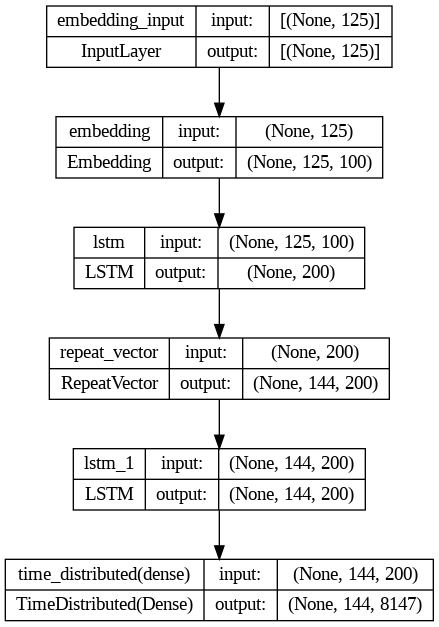

In [18]:
en_de_trans_lstm_model = define_lstm_model(en_num_words,de_num_words, en_max_len, de_max_len,EMBED_DIM,N_UNITS)
tf.keras.utils.plot_model(en_de_trans_lstm_model, show_shapes=True)
##


In [19]:
en_de_trans_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 125, 100)          627300    
                                                                 
 lstm (LSTM)                 (None, 200)               240800    
                                                                 
 repeat_vector (RepeatVector  (None, 144, 200)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 144, 200)          320800    
                                                                 
 time_distributed (TimeDistr  (None, 144, 8147)        1637547   
 ibuted)                                                         
                                                                 
Total params: 2,826,447
Trainable params: 2,826,447
Non-

In [20]:
history=train_model(en_de_trans_lstm_model,X_train,y_train,EPOCHS,BATCH_SIZE,VALIDATION_SPLIT)

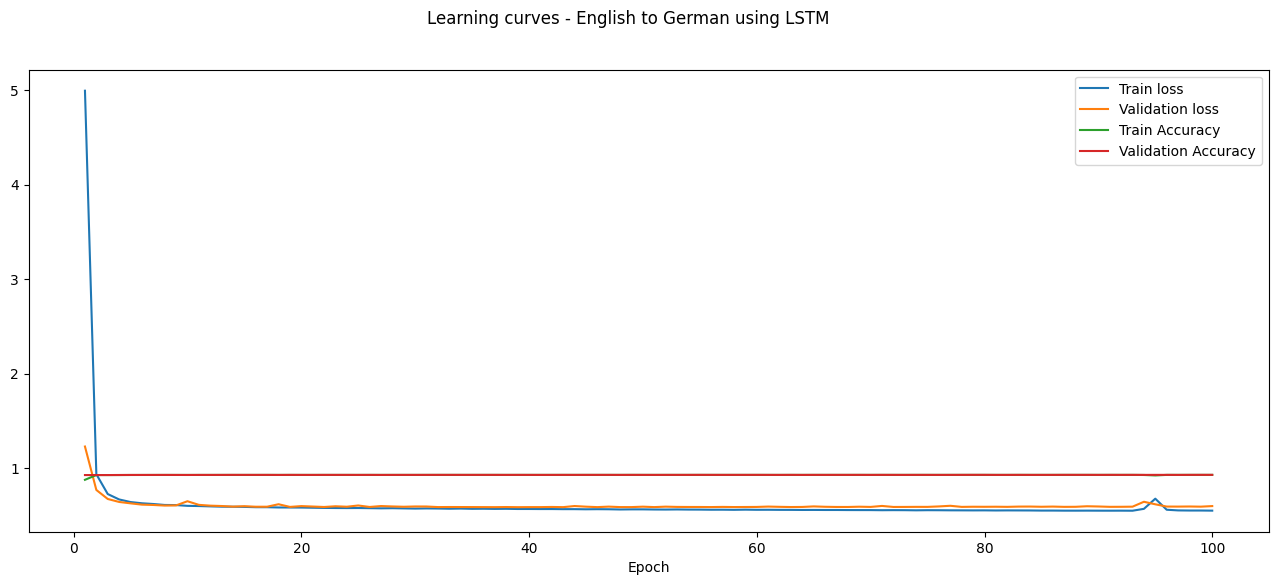

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
x = np.arange(1,len(history.history['loss'])+1)
plt.plot(x, history.history['loss'], label='Train loss')
plt.plot(x, history.history['val_loss'], label='Validation loss')
plt.plot(x, history.history['acc'], label='Train Accuracy')
plt.plot(x, history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.suptitle('Learning curves - English to German using LSTM')
plt.legend();

In [22]:
score,test_predictions = evaluate_model(en_de_trans_lstm_model, X_test, y_test,en_idx2word,de_idx2word)
print(f'Translated Text Score for 1-gram : {score["bleu1"]}')
print(f'Translated Text Score for 2-gram : {score["bleu2"]}')
print(f'Translated Text Score for 3-gram : {score["bleu3"]}')
print(f'Translated Text Score for 4-gram : {score["bleu4"]}')

Translated Text Score for 1-gram : 0.06303129049913084
Translated Text Score for 2-gram : 0.016464670602452353
Translated Text Score for 3-gram : 3.3503128411833046e-94
Translated Text Score for 4-gram : 1.3984163554674278e-155


/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [23]:
pd.DataFrame(test_predictions).head()

,ORIGINAL_TEXT,ACTUAL_TRANSLATION,PREDICTED_TRANSLATION
0,forums about el cabo de gata almeria,foren uber el cabo de gata almeria,das sie sie im und
1,therefore make sure that you follow these step...,diese probleme konnen eine neuinstallation des...,das sie sie im und und
2,new to casino tropez mobile is the refer a fri...,neu in casino tropez mobile ist das freundscha...,das sie sie im und und und
3,it has a very fast overall analysis turnaround...,auerdem zeichnet sie sich durch eine sehr schn...,das sie sie im und und
4,casino net publish monthly information that st...,casino net veroffentlicht monatlich informatio...,das sie ist im und und und und


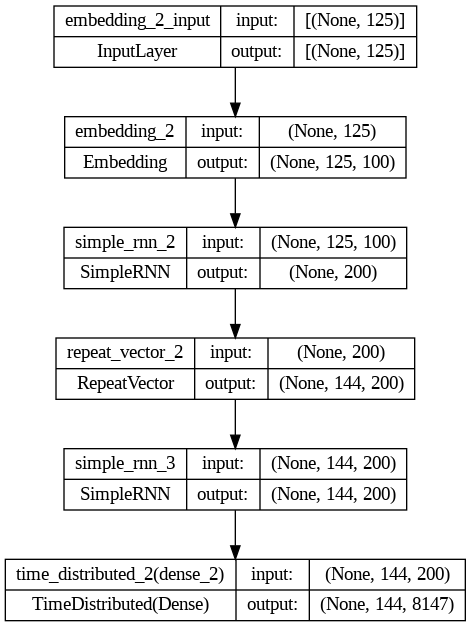

In [26]:
en_de_trans_rnn_model = define_rnn_model(en_num_words,de_num_words, en_max_len, de_max_len,EMBED_DIM,N_UNITS)
tf.keras.utils.plot_model(en_de_trans_rnn_model, show_shapes=True)

In [27]:
en_de_trans_rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 125, 100)          627300    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 200)               60200     
                                                                 
 repeat_vector_2 (RepeatVect  (None, 144, 200)         0         
 or)                                                             
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 144, 200)          80200     
                                                                 
 time_distributed_2 (TimeDis  (None, 144, 8147)        1637547   
 tributed)                                                       
                                                                 
Total params: 2,405,247
Trainable params: 2,405,247
No

In [28]:
history=train_model(en_de_trans_rnn_model,X_train,y_train,EPOCHS,BATCH_SIZE,VALIDATION_SPLIT)

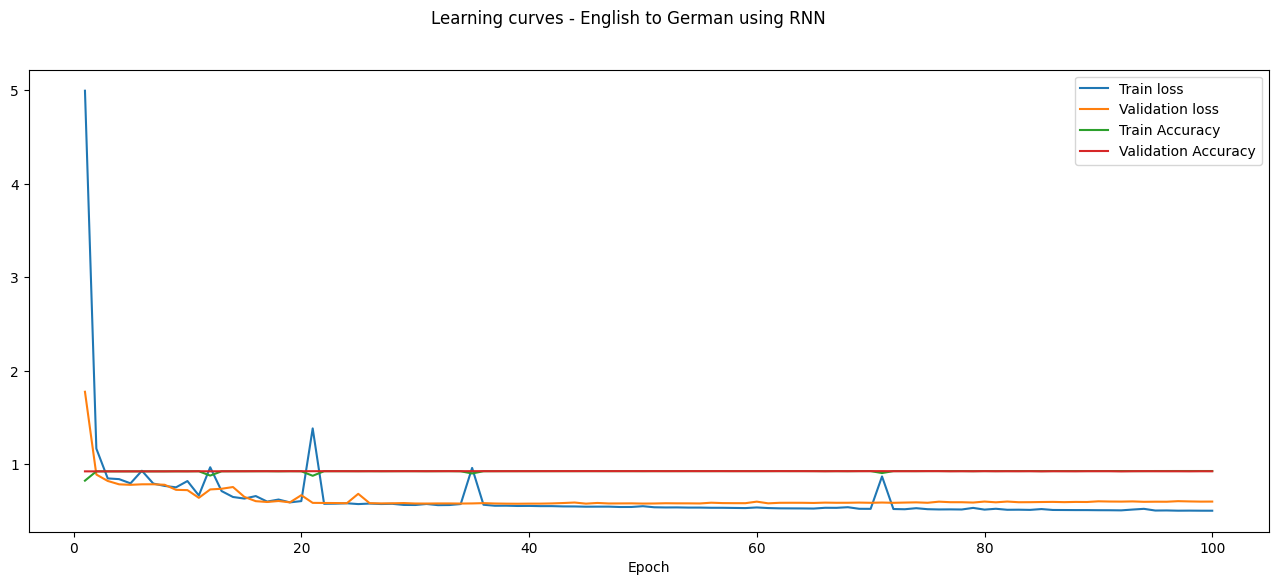

In [29]:
plt.figure(figsize=(16, 6))
x = np.arange(1,len(history.history['loss'])+1)
plt.plot(x, history.history['loss'], label='Train loss')
plt.plot(x, history.history['val_loss'], label='Validation loss')
plt.plot(x, history.history['acc'], label='Train Accuracy')
plt.plot(x, history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.suptitle('Learning curves - English to German using RNN')
plt.legend();

In [30]:
score,test_predictions = evaluate_model(en_de_trans_rnn_model, X_test, y_test,en_idx2word,de_idx2word)
print(f'Translated Text Score for 1-gram : {score["bleu1"]}')
print(f'Translated Text Score for 2-gram : {score["bleu2"]}')
print(f'Translated Text Score for 3-gram : {score["bleu3"]}')
print(f'Translated Text Score for 4-gram : {score["bleu4"]}')

Translated Text Score for 1-gram : 0.09829543791962704
Translated Text Score for 2-gram : 0.0322879598575202
Translated Text Score for 3-gram : 0.027448541177096806
Translated Text Score for 4-gram : 0.012628396950045936


In [31]:
pd.DataFrame(test_predictions).head()

,ORIGINAL_TEXT,ACTUAL_TRANSLATION,PREDICTED_TRANSLATION
0,forums about el cabo de gata almeria,foren uber el cabo de gata almeria,wann sie sie in in hotel
1,therefore make sure that you follow these step...,diese probleme konnen eine neuinstallation des...,wann sie sie im hotel hotel
2,new to casino tropez mobile is the refer a fri...,neu in casino tropez mobile ist das freundscha...,das sie ist die und und und und und
3,it has a very fast overall analysis turnaround...,auerdem zeichnet sie sich durch eine sehr schn...,das sie ist die und und und und und und
4,casino net publish monthly information that st...,casino net veroffentlicht monatlich informatio...,das ist ist die der der der
